# Predicting if the Customer will Subscribe a Term Deposit

**Message To Reviewer**

- Dear Reviewer, I have split this notebook into three sections for better readability. Kindly review it section by section.

- 1)Exploratory Data Analysis
- 2) Feature Engineering
- 3) Model Tranining and Performance Evaluation

- I have covered all the necessary scenarios,and i also created framework version with classes,loggers,docker file.kindly give me an opportunity to present my analysis and insights.

**Objective:** The Objective of this problem statement is to create classification model which predicts if the client will subscribe a term deposit or not.

**About Dataset:** The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed or not.

# Exploratory Data Analysis:

- For any machine learning task, the most important thing is to investigate the data.
- The data itself can reveal many hidden secrets and helps massively in building an effective machine learning solution. Naturally, the first step is to see what the raw data looks like.

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
#All imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Setting maximum number of columns to None to display all columns
pd.options.display.max_columns = None

In [ ]:
# Defining a function to quickly obtain a summary of the data
def summary(df,n=3):
  display(df.head(n))
  display(df.info())
  display(df.shape)

In [ ]:
raw_df=pd.read_csv('/content/mydrive/MyDrive/connexone/bank-direct-marketing.csv', delimiter=";")

In [ ]:
assert raw_df is not None, "raw_df cannot be None"

In [ ]:
summary(raw_df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

None

(41188, 21)

In [ ]:
# Identifying number of categorical and numerical features
categorical_features = raw_df.select_dtypes(include=['object']).columns.tolist()
numeric_features = raw_df.select_dtypes(exclude=['object']).columns.tolist()

print("Number of Categorical Variables:", len(categorical_features))
print("Number of Numeric Variables:", len(numeric_features))

Number of Categorical Variables: 11
Number of Numeric Variables: 10


In [ ]:
# Identifying possible values in each categorical feature
for idx, col in enumerate(raw_df.select_dtypes(include='object').columns, start=1):
    unique_values = ", ".join(raw_df[col].unique())
    print(f"{idx}. {col}: [{unique_values}]")

1. job: [housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]
2. marital: [married, single, divorced, unknown]
3. education: [basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]
4. default: [no, unknown, yes]
5. housing: [no, yes, unknown]
6. loan: [no, yes, unknown]
7. contact: [telephone, cellular]
8. month: [may, jun, jul, aug, oct, nov, dec, mar, apr, sep]
9. day_of_week: [mon, tue, wed, thu, fri]
10. poutcome: [nonexistent, failure, success]
11. y: [no, yes]


**Take-away**:
- In this dataset, there are no null values. Some features have 'unknown' values.At this moment not using any imputation techniques to impute unknown.

- In this analysis, 'unknown' is treated as a valid category. This approach is helpful when making predictions if a feature is empty, it is considered as 'unknown.' This allows for more robust modeling and predictions..

**Exploring Target Variable:**

no     36548
yes     4640
Name: y, dtype: int64

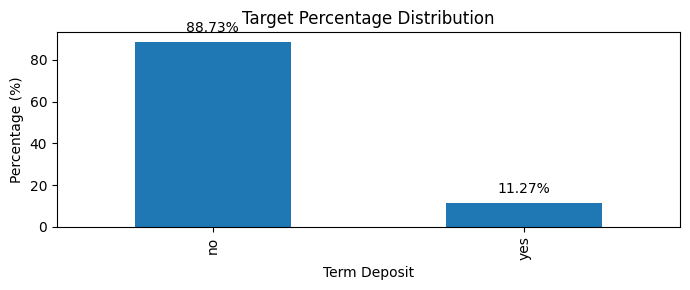

In [ ]:
display(raw_df['y'].value_counts())
target_percentage = raw_df['y'].value_counts(normalize=True) * 100
# Plot the bar graph with percentages
plt.figure(figsize=(7, 3))
ax = target_percentage.plot(kind='bar')
plt.title('Target Percentage Distribution')
plt.xlabel('Term Deposit')
plt.ylabel('Percentage (%)')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


**Take-away**:
- Data is highly imbalanced we should use sampling techniques like OverSampling,UnderSampling,SMOTE etc.

**Exploring Categorical Features Distribution:**

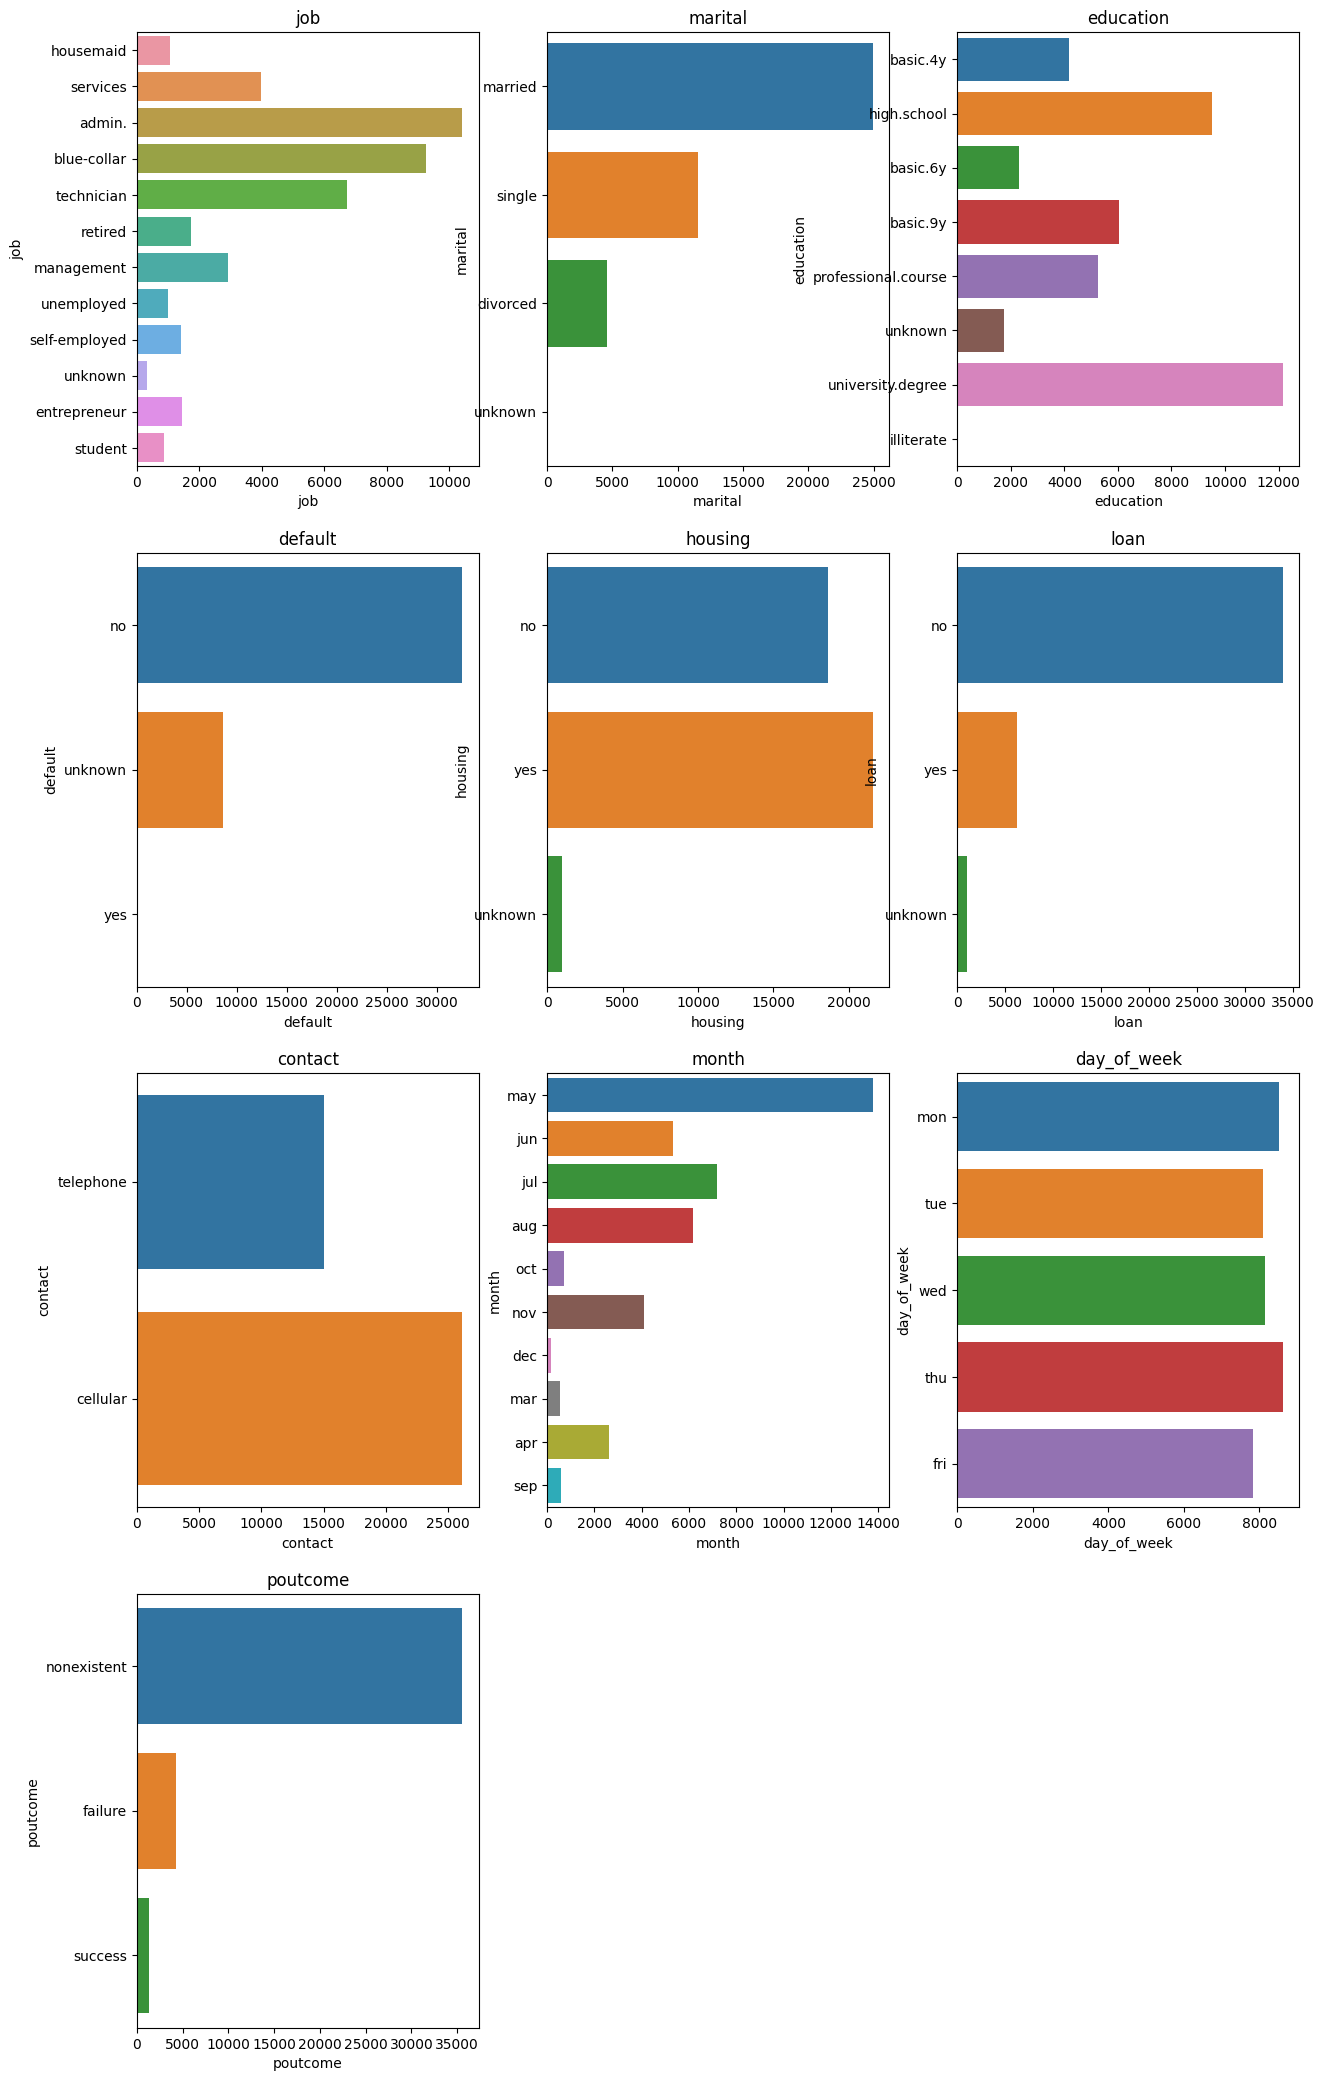

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    if categorical_feature != 'y':
      ax = plt.subplot(12,3,plotnumber)
      sns.countplot(y=categorical_feature,data=raw_df)
      plt.xlabel(categorical_feature)
      plt.title(categorical_feature)
      plotnumber+=1
plt.show()

**Take-away**:
- **job:** The majority of clients in the dataset are in administrative roles, followed by blue-collar jobs and technicians.
- **marital:** A significant majority of clients are married.
- **education:** The highest number of individuals have completed a university degree or have a high school education.
- **default:** The "default" feature may not play a significant role, as it has a predominantly high ratio of "no" values compared to "yes"
** However, from a business perspective, this is a crucial feature. Customers who have defaulted on loans are more likely to not subscribe **
- **housing**: The dataset is almost evenly split between clients with and without housing loans.
- **loan:** Most individuals do not have a personal loan.
- **contact:** The majority of contacts with clients are made via cellular phones, with fewer contacts made through telephone.
- **month**: The dataset has a high concentration of client contacts made in the month of May..
- **day_of_week**: Client contacts are fairly evenly distributed across all weekdays, with no significant differences observed.
- **poutcome:** Most of the clients were not contacted for a previous campaign, indicated by the "nonexistent" category.
A very small proportion of clients had a successful outcome ("success") in the previous campaign.
Clients with a "failure" outcome in the previous campaign are also in the minority.

**Exploring Numerical Features Distribution:**

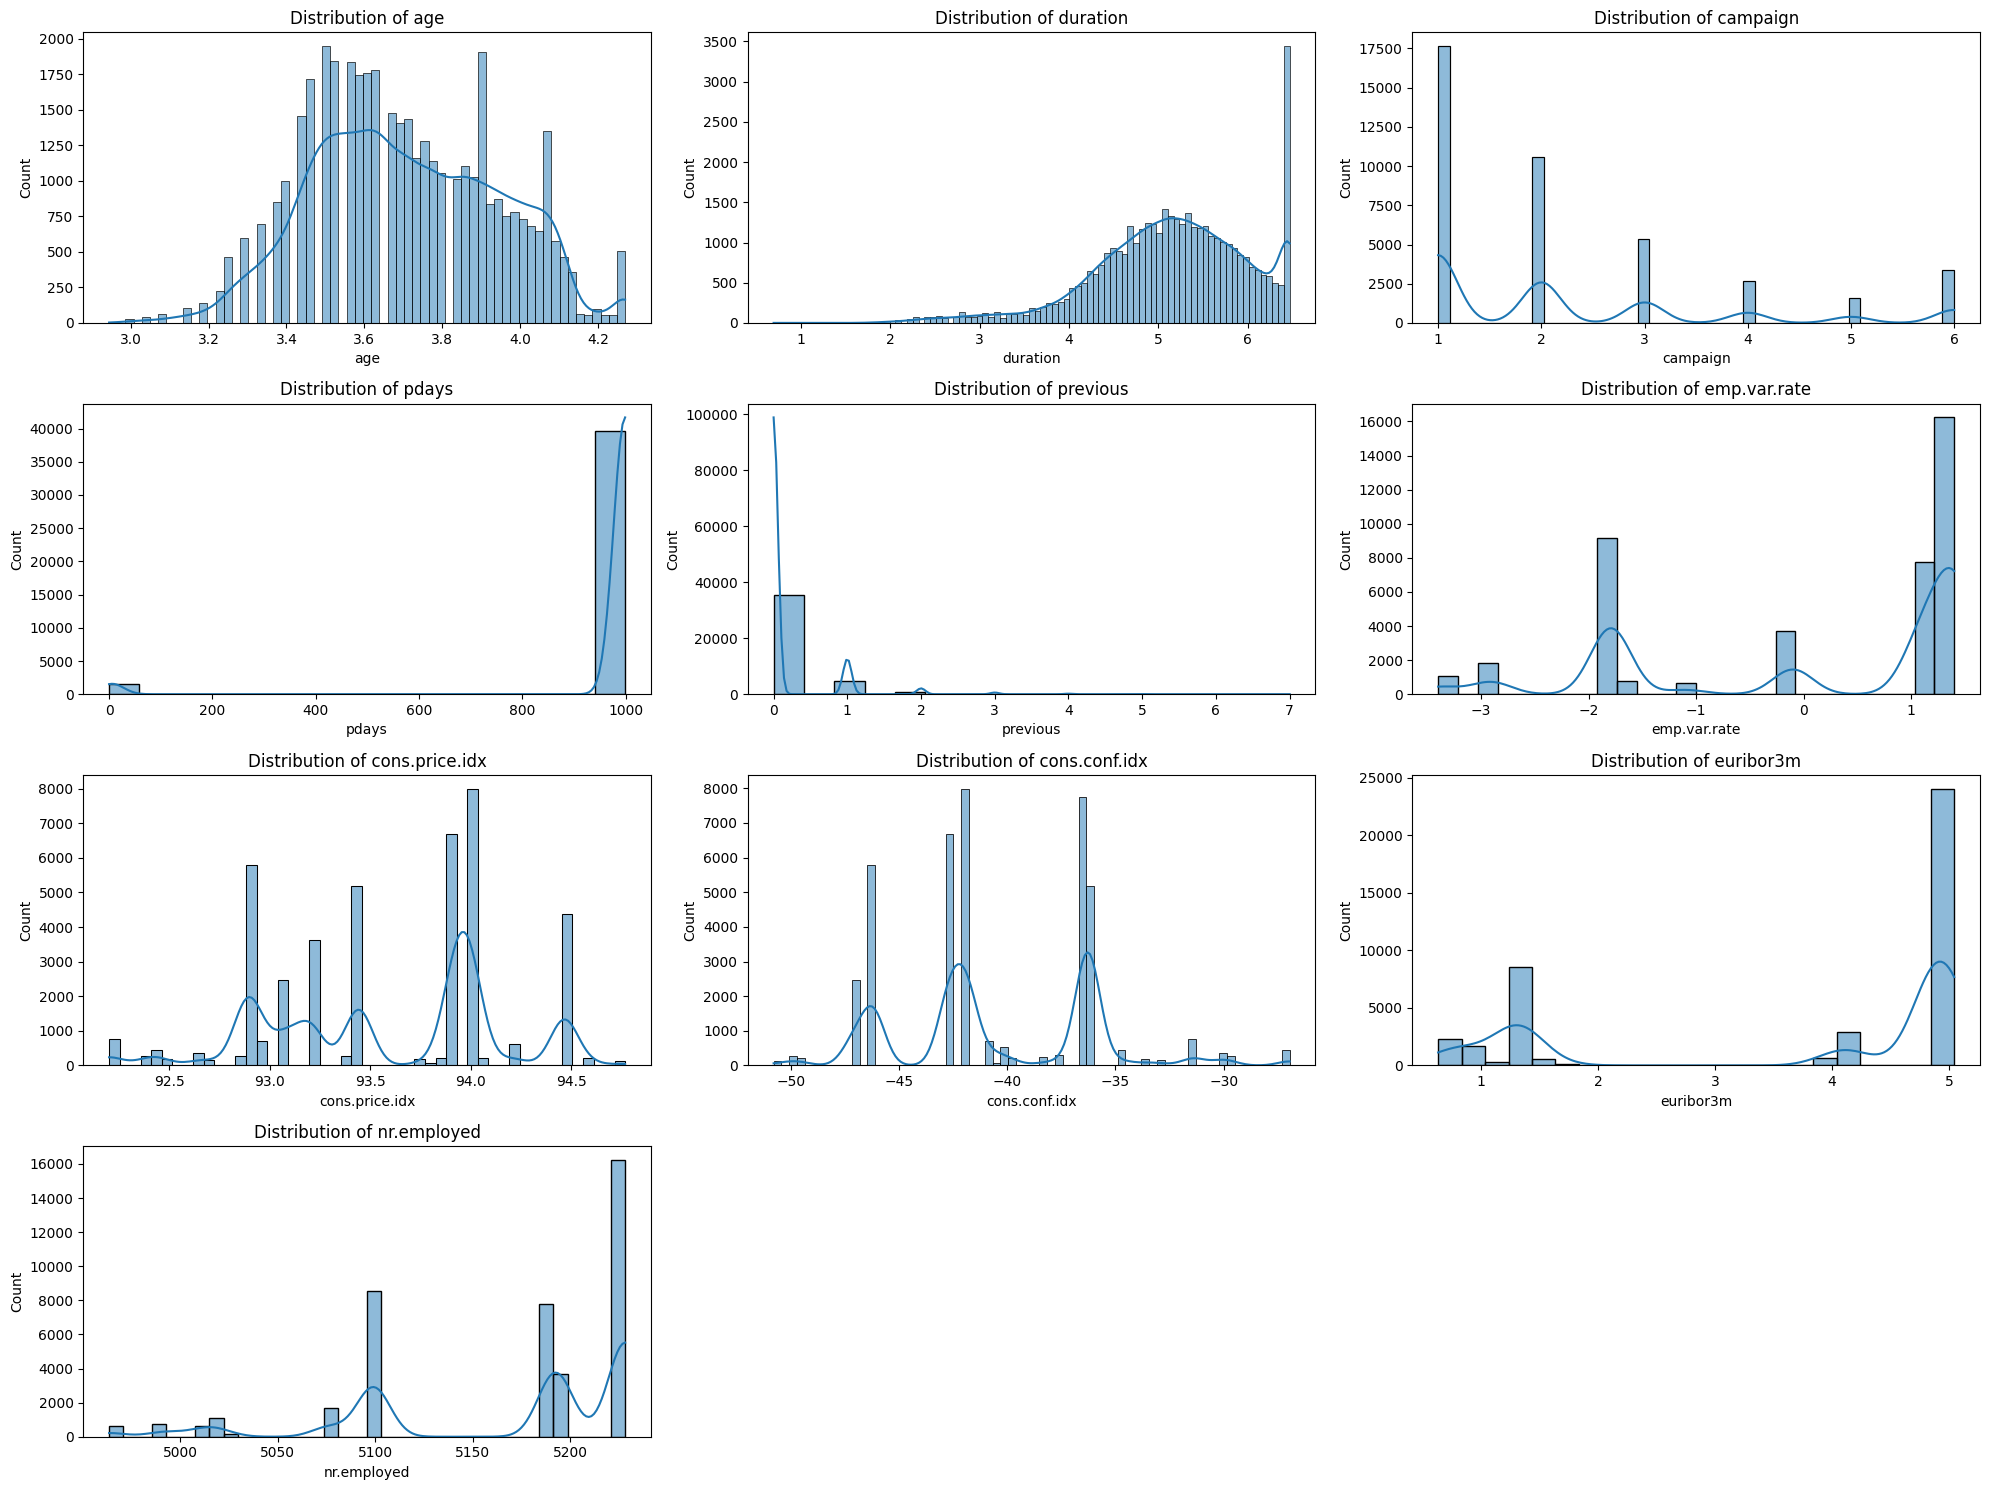

In [ ]:
plt.figure(figsize=(20, 15), facecolor='white')

# Plotting each numerical feature
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(raw_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

**Take -away**

- **Age**: The distribution is slightly right-skewed, indicating that the dataset contains more younger individuals than older ones. The majority of customers seem to be in the age range of 20 to 60.

- **Duration**: This feature is highly right-skewed. Most of the calls have a duration of less than 500 seconds, with a few calls lasting significantly longer.

- **Campaign**: Most of the customers have been contacted for the campaign 1 to 3 times. There are a few customers who have been contacted many more times, but they are outliers.

- **Pdays**: The value "999" a placeholder or code for customers who were not previously contacted. Apart from that, the rest of the data is quite dispersed.

- **Previous**: Most of the customers have not been contacted before the current campaign. A very small fraction has been contacted 1 to 3 times before.

- **Emp.var.rate**: There are clear peaks in the distribution, suggesting certain common economic variance rates.

- **Cons.price.idx:** This feature has a multimodal distribution, indicating several common consumer price indices in the dataset.

- **Cons.conf.idx:** The consumer confidence index seems to have a varied distribution, with a few peaks indicating common index values.

- **Euribor3m:** The 3 month Euribor interest rate also shows a multimodal distribution, suggesting certain common interest rates in the dataset.

- **Nr.employed:** The number of employees shows a multimodal distribution. There are certain common values that dominate the dataset.

**Note: We have features with a skewed distribution that might benefit from a log transformation. However, some features contain values of zero or negative values, which could affect the outcome of the transformation needs to be handle carefully**


**Exploring Relation Between Categorical Features and Target:**

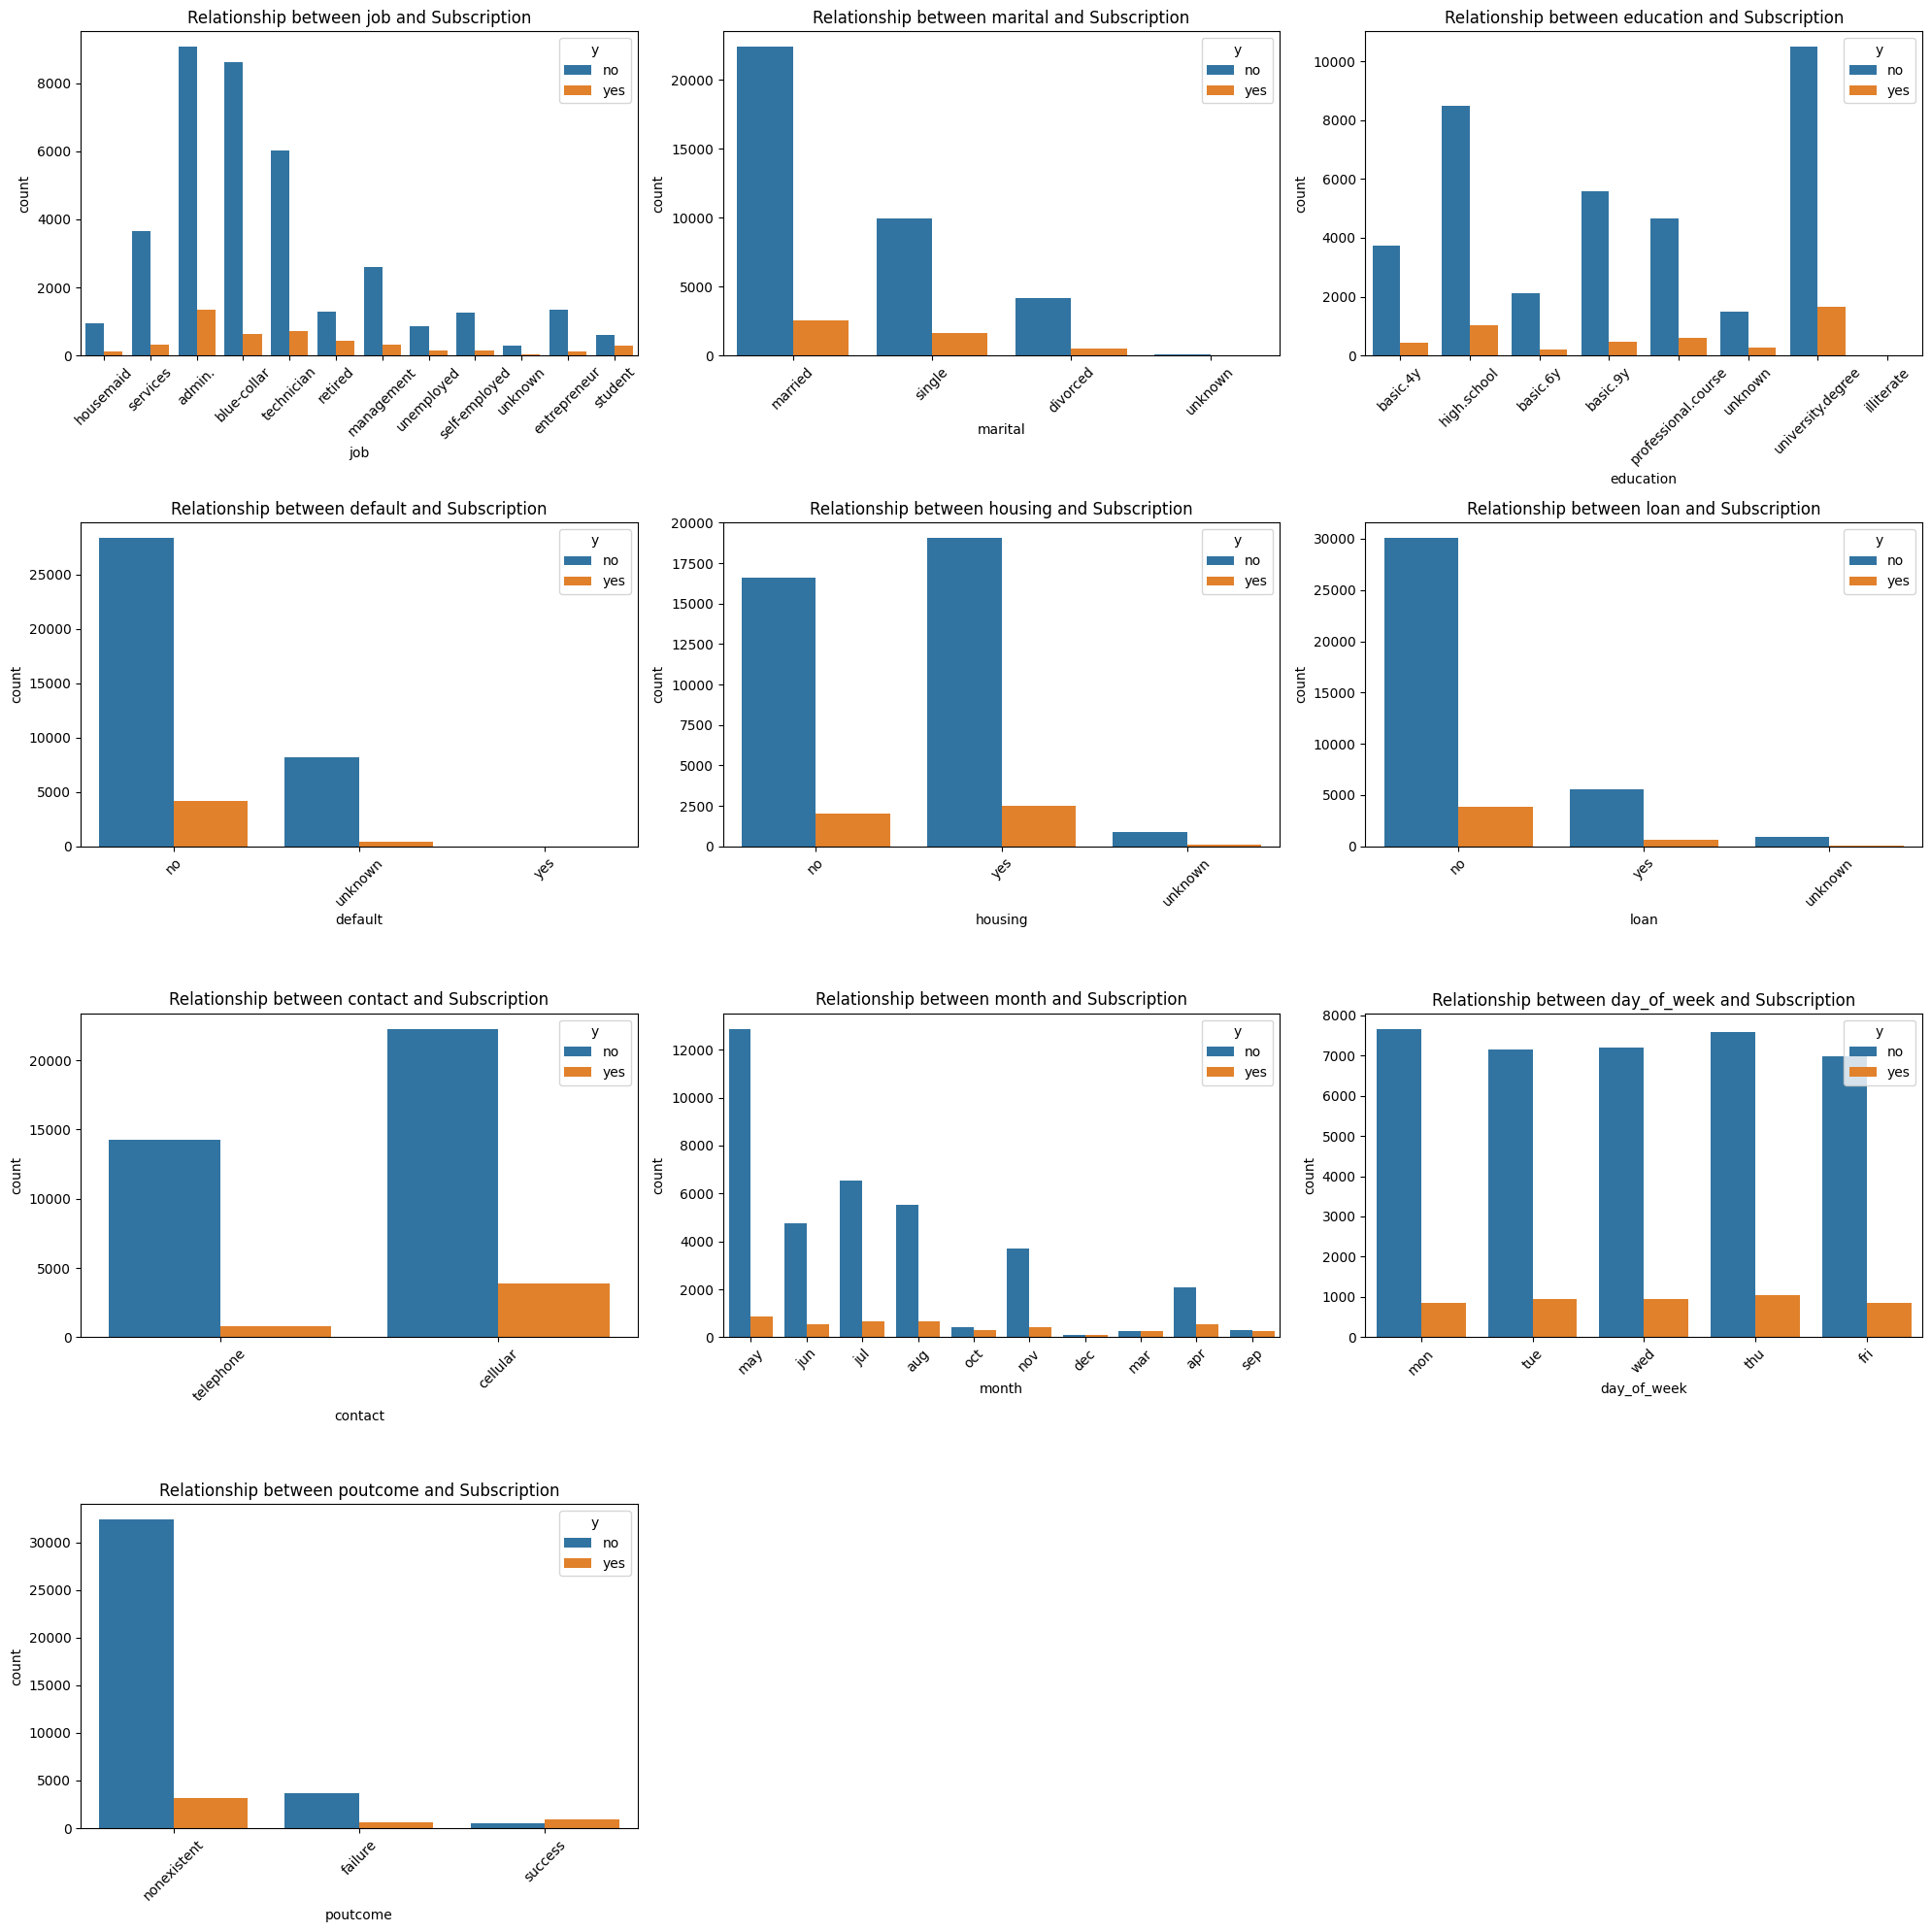

In [ ]:
plt.figure(figsize=(20, 20))
# Plotting the relationship between categorical features and subscription status
for i, col in enumerate(categorical_features[:-1], 1):  # Excluding 'y' since it's the target
    plt.subplot(4, 3, i)
    sns.countplot(data=raw_df, x=col, hue='y')
    plt.title(f'Relationship between {col} and Subscription')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

**Exploring Relation Between Numerical Features and Target:**

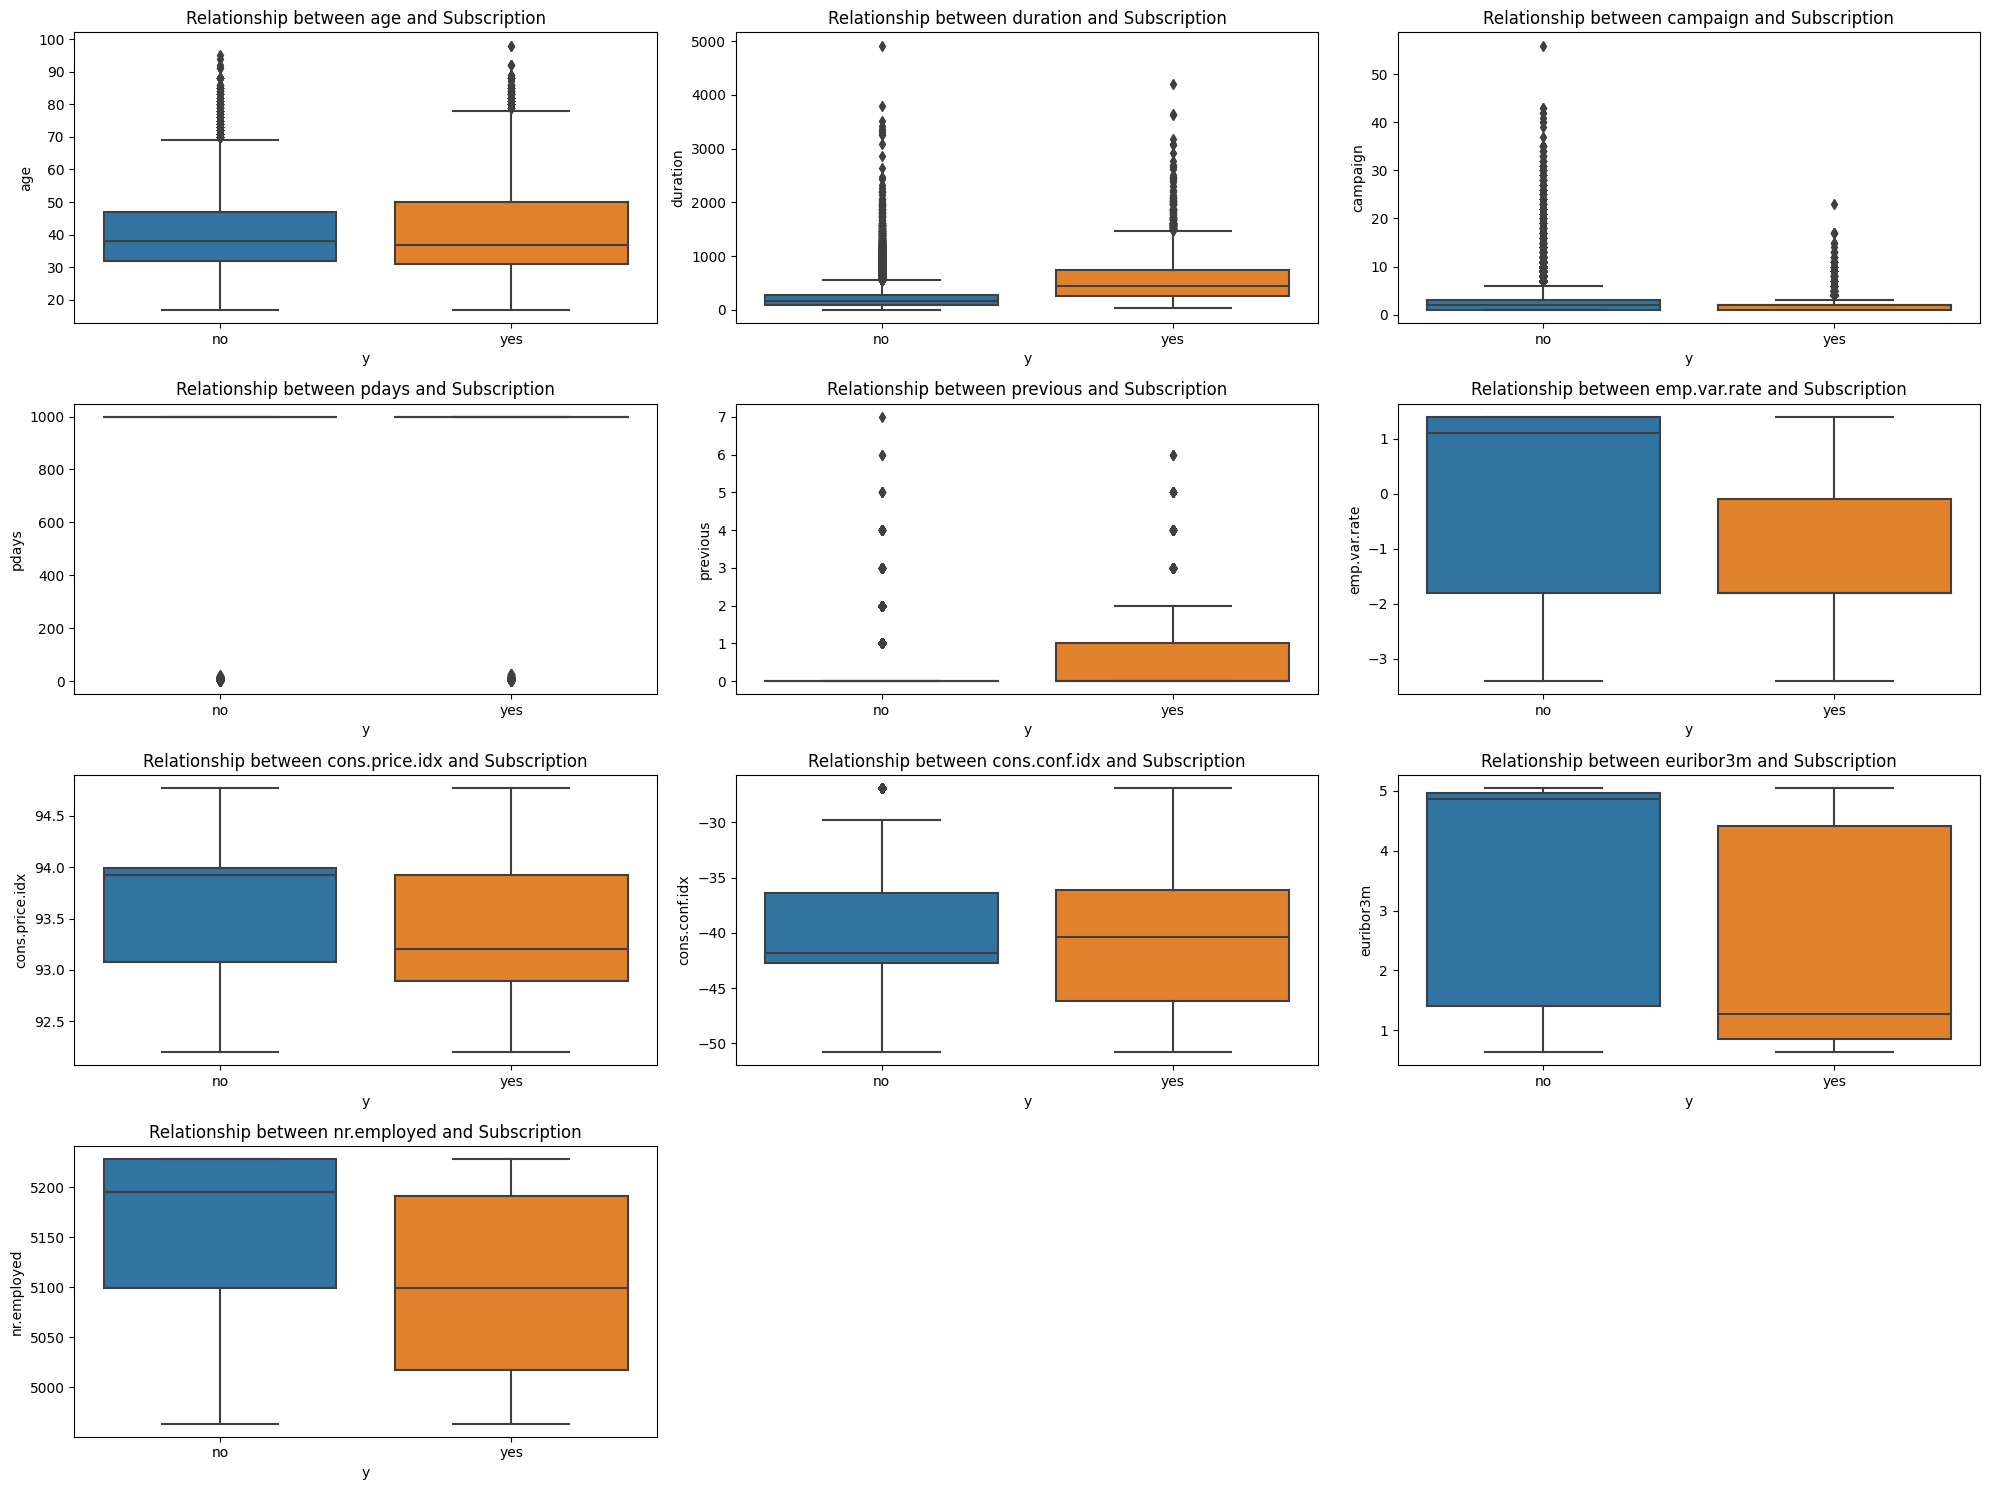

In [ ]:
plt.figure(figsize=(20, 15))

# Plotting the relationship between numerical features and subscription status
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=raw_df, x='y', y=col)
    plt.title(f'Relationship between {col} and Subscription')
    plt.tight_layout()

plt.show()

**Explore the Correlation between numerical features**

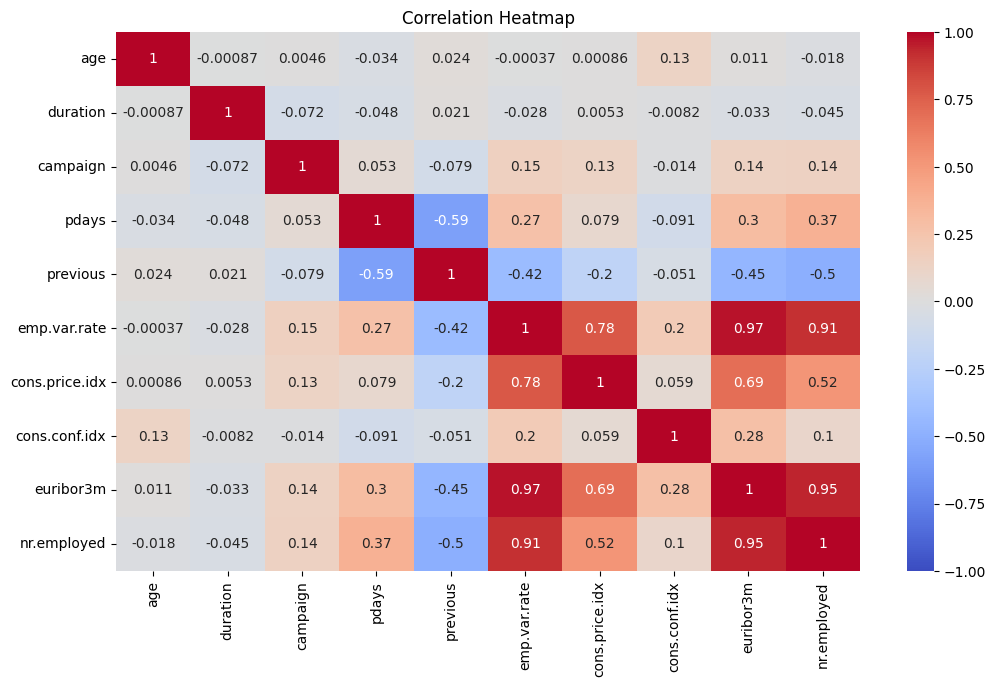

In [ ]:
cor_mat=raw_df.corr(numeric_only=True)
fig = plt.figure(figsize=(12,7))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


**Take-away**
- We have highly correlated pairs of numerical variables. As part of model A we will consider all of them but for Model B we will remove multicolinear features:

 * emp.var.rate & cons.price.idx: Correlation coefficient of 0.78
 * emp.var.rate & euribor3m: Correlation coefficient of 0.97
 * emp.var.rate & nr.employed: Correlation coefficient of 0.91
 * euribor3m & nr.employed: Correlation coefficient of 0.95
 * pdays & previous: Correlation coefficient of -0.59

 - We have outliers in features age,duration,campaign.

# Feature Engineering

**As part of feature engineering we will do following preprocessing steps:**
- Drop duplicates
- Drop unwanted Features like if there is any id kind of feature from EDA we don't have such features.
- Handle Missing Values.
- Remove Outliers
- Handling Skewed features applying log transformation.
- Handle Feature Scalling
- Handle Categorical Features
- Make the Dataset balanced

**Note:**

**I have verified the value counts for each feature to understand their distributions and potential outliers, but I haven't included the detailed counts here to avoid making the notebook lengthy**
- The pdays and previous features require special attention, as approximately 90% of their entries are 999 and 0, respectively. This indicates that the vast majority of clients were not contacted in previous campaigns.
- Features where a single value constitutes around 90% of the entries might offer limited predictive power and could be considered for exclusion in more streamlined models.

- There is a inconsistency also between pdays and previous. Discrepancy of 4,110 rows was identified where pdays indicated no prior contact (value = 999), but the previous column did not align with this (value = 0).

In [ ]:
# Function to fix outliers
def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Function to apply log transformation to skewed features
def transform_skewed_features(df, skewed_features):
  for col in skewed_features:
      # Add a small constant (e.g., 1) to handle 0's
        df[col] = np.log1p(df[col] + 1)
  return df

# Function to apply scaling
def apply_scaling(dataframe, columns_list):
    df = dataframe.copy()
    # Replace 999 with 0 in the 'pdays' column if it's in the list
    if 'pdays' in columns_list:
        df['pdays'] = df['pdays'].replace(999, 0)
    # Apply scaling to the columns in the list
    scaler = StandardScaler()
    df[columns_list] = scaler.fit_transform(df[columns_list])
    return df

# Function to apply label encoding
def apply_label_encoding(dataframe, columns_to_encode):
    df_copy = dataframe.copy()
    encoder = LabelEncoder()
    for column in columns_to_encode:
        if column in df_copy.columns:
            df_copy[column] = encoder.fit_transform(df_copy[column])
    return df_copy

# Function to apply onehot encoding
def apply_one_hot_encoding(dataframe, columns_list):
    df_copy = dataframe.copy()
    encoder = OneHotEncoder(sparse_output=False)
    for column in columns_list:
        if column in df_copy.columns:
            # Apply one-hot encoding
            encoded_data = encoder.fit_transform(df_copy[[column]])
            encoded_cols = encoder.get_feature_names_out([column])

            # Add the encoded columns directly to the df_copy
            df_copy[encoded_cols] = encoded_data

            # Drop the original column from the copied dataframe
            df_copy.drop(column, axis=1, inplace=True)

    return df_copy

def apply_education_binning(df):
    # Define the mapping of education levels to categories
    education_mapping = {
        'basic.4y': 'Basic',
        'basic.6y': 'Basic',
        'basic.9y': 'Basic',
        'professional.course': 'Higher Education',
        'high.school': 'Higher Education',
        'university.degree': 'Higher Education',
        'unknown': 'Unknown',
        'illiterate': 'Illiterate'
    }
    # Map education levels to categories in the 'education' column
    df['education'] = df['education'].map(education_mapping)
    return df

**Note**
- Addressing outliers in the 'age', 'duration', 'campaign', and 'cons.conf.idx' features.
- Applying log transformation to 'age' and 'duration' features to reduce skewness.
- Scaling all numeric features to standardize their scales.
- Performing label encoding for binary categorical features ('yes' or 'no' values) to prepare them for modeling.
- Implementing binning for the 'education' feature to reduce the number of categories.


In [ ]:
outlier_features=['age', 'duration', 'campaign','cons.conf.idx']
skewed_features=['age', 'duration']
label_encoding_features = ['default', 'housing', 'loan', 'contact','y']
scaling_features=numeric_features
binning_feature=['education']
one_hot_encoding_features= ['job', 'marital', 'education','month', 'day_of_week', 'poutcome']


In [ ]:
# Create a preprocessing pipeline
def preprocessing_pipeline(df):
    df = handle_outliers(df, outlier_features)
    df = transform_skewed_features(df, skewed_features)
    df = apply_scaling(df, scaling_features)
    df = apply_label_encoding(df, label_encoding_features)
    df = apply_education_binning(df)
    df = apply_one_hot_encoding(df, one_hot_encoding_features)
    return df

In [ ]:
processed_df=preprocessing_pipeline(raw_df)

In [ ]:
processed_df.head(3)

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_Higher Education,education_Illiterate,education_Unknown,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.479453,0,0,0,1,0.483369,-0.822497,-0.164012,-0.349494,0.648092,0.722722,0.886869,0.71246,0.33168,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.551153,1,0,0,1,-0.162164,-0.822497,-0.164012,-0.349494,0.648092,0.722722,0.886869,0.71246,0.33168,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.185196,0,2,0,1,0.317228,-0.822497,-0.164012,-0.349494,0.648092,0.722722,0.886869,0.71246,0.33168,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Model Training & Performance Evaluation

**Developing Model A:**

In [ ]:
def get_train_test_splits(df, target_column, test_size=0.2, random_state=42):
    """
    splits the Data into training and test samples
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    return X_train, X_test, y_train, y_test

def get_dataset_balanced(X_train, y_train, random_state=42):
    """
    makes Dataset Balanced
    """
    smt = SMOTETomek(random_state=random_state)
    X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

# performance evalution metric
def evaluate_classifier_metrics(classifier, X_test, y_test):
    """
    Evaluates a classifier's performance and prints various classification metrics.
    """
    # Predict
    y_pred = classifier.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Calculate ROC-AUC if the classifier supports predict_proba
    roc_auc = None
    if hasattr(classifier, 'predict_proba'):
        y_pred_proba = classifier.predict_proba(X_test)[:, 1]  # Assuming binary classification
        roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Print the metrics

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Plot ROC curve
    if roc_auc is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(2, 2))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()


In [ ]:
X_train, X_test, y_train, y_test = get_train_test_splits(processed_df, 'y', test_size=0.2, random_state=42)
X_resampled, y_resampled = get_dataset_balanced(X_train, y_train)


Logistic Regression
-------------------
Accuracy: 0.85
Precision: 0.43
Recall: 0.88
F1 Score: 0.57
Confusion Matrix:
 [[6215 1095]
 [ 112  816]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      7310
           1       0.43      0.88      0.57       928

    accuracy                           0.85      8238
   macro avg       0.70      0.86      0.74      8238
weighted avg       0.92      0.85      0.87      8238

ROC-AUC: 0.94


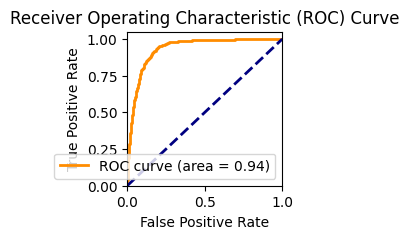


XGBoost
-------
Accuracy: 0.91
Precision: 0.61
Recall: 0.62
F1 Score: 0.62
Confusion Matrix:
 [[6940  370]
 [ 351  577]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      7310
           1       0.61      0.62      0.62       928

    accuracy                           0.91      8238
   macro avg       0.78      0.79      0.78      8238
weighted avg       0.91      0.91      0.91      8238

ROC-AUC: 0.95


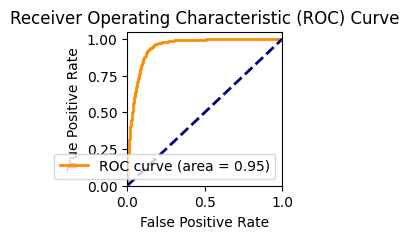


Gradient Boosting
-----------------
Accuracy: 0.89
Precision: 0.51
Recall: 0.84
F1 Score: 0.63
Confusion Matrix:
 [[6547  763]
 [ 149  779]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.93      7310
           1       0.51      0.84      0.63       928

    accuracy                           0.89      8238
   macro avg       0.74      0.87      0.78      8238
weighted avg       0.92      0.89      0.90      8238

ROC-AUC: 0.94


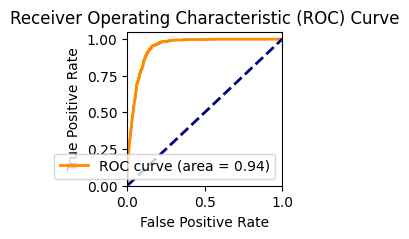

In [ ]:
# Instantiation
logistic_clf = LogisticRegression(max_iter=1000, random_state=42)
xgb_clf = XGBClassifier(random_state=42)
gradient_boosting_clf = GradientBoostingClassifier(random_state=42)

classifiers = {
    'Logistic Regression': logistic_clf,
    'XGBoost': xgb_clf,
    'Gradient Boosting': gradient_boosting_clf,
}

# Training and Evaluation
for name, clf in classifiers.items():
    # Train
    clf.fit(X_resampled, y_resampled)
    # Evaluate and store the results
    print(f"\n{name}")
    print("-" * len(name))
    evaluate_classifier_metrics(clf, X_test, y_test)

**Take-away**
- Xgboost ,Gradient Boosting performing better than logistic regression.
- I experimented with various algorithms, including Random Forest, Naive Bayes, and SVM. However, these models did not yield better results than the current ones, leading to my decision to finalize the present models.
- Since approximately 80% of the data belongs to the 'no' class, the model is performing well in predicting instances belonging to that class.

- By fine tuning we can improve the performance.But when i run the RandomizedSearchCV my notebook is not responding hence couldn't cover that part.

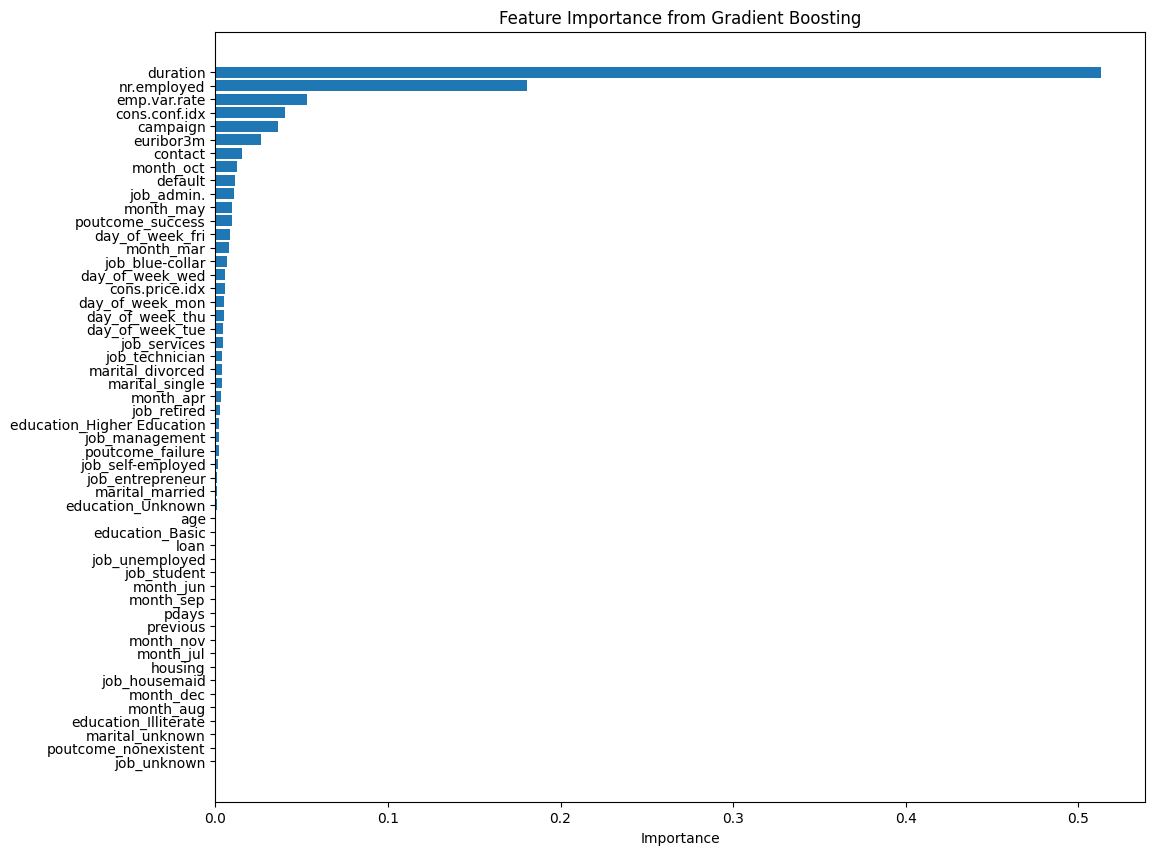

In [ ]:
# Extract and plot feature importances from Gradient Boosting
feature_importances = gradient_boosting_clf.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(12, 10))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance from Gradient Boosting')
plt.show()


**Duration is the most important feature to consider it highly affects the output target . But, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. This may be discarded if the intention is to have a realistic predictive model**

**Developing Model B:**

- As part of model B considering these 5 features.**'duration','default','loan','job','nr.employed'**
- selected thesefeatures by leveraging Business knowledge, excluding those exhibiting multicollinearity, and employing a technique that considers feature importance.

In [ ]:
# Taking required features from processed_df which is already preprocessed
modelb_df=processed_df[['duration','default','loan','job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown','nr.employed','y']]

In [ ]:
modelb_df.head(3)

,duration,default,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,nr.employed,y
0,0.483369,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.33168,0
1,-0.162164,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.33168,0
2,0.317228,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.33168,0


In [ ]:
X_train, X_test, y_train, y_test = get_train_test_splits(modelb_df, 'y', test_size=0.2, random_state=42)
X_resampled, y_resampled = get_dataset_balanced(X_train, y_train)


Logistic Regression
-------------------
Accuracy: 0.82
Precision: 0.37
Recall: 0.90
F1 Score: 0.52
Confusion Matrix:
 [[5894 1416]
 [  97  831]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      7310
           1       0.37      0.90      0.52       928

    accuracy                           0.82      8238
   macro avg       0.68      0.85      0.70      8238
weighted avg       0.91      0.82      0.85      8238

ROC-AUC: 0.92


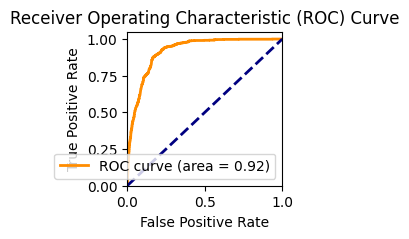


XGBoost
-------
Accuracy: 0.86
Precision: 0.43
Recall: 0.88
F1 Score: 0.58
Confusion Matrix:
 [[6238 1072]
 [ 116  812]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      7310
           1       0.43      0.88      0.58       928

    accuracy                           0.86      8238
   macro avg       0.71      0.86      0.75      8238
weighted avg       0.92      0.86      0.88      8238

ROC-AUC: 0.93


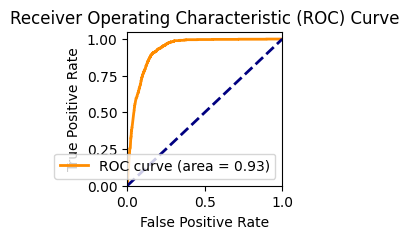


Gradient Boosting
-----------------
Accuracy: 0.85
Precision: 0.42
Recall: 0.90
F1 Score: 0.57
Confusion Matrix:
 [[6166 1144]
 [  96  832]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      7310
           1       0.42      0.90      0.57       928

    accuracy                           0.85      8238
   macro avg       0.70      0.87      0.74      8238
weighted avg       0.92      0.85      0.87      8238

ROC-AUC: 0.94


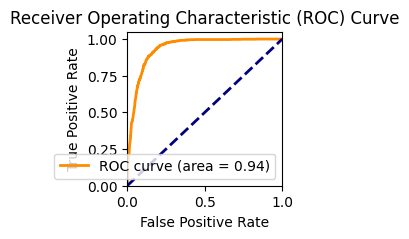

In [ ]:
# Instantiation
logistic_clf = LogisticRegression(max_iter=1000, random_state=42)
xgb_clf = XGBClassifier(random_state=42)
gradient_boosting_clf = GradientBoostingClassifier(random_state=42)

classifiers = {
    'Logistic Regression': logistic_clf,
    'XGBoost': xgb_clf,
    'Gradient Boosting': gradient_boosting_clf,
}

# Training and Evaluation
for name, clf in classifiers.items():
    # Train
    clf.fit(X_resampled, y_resampled)
    # Evaluate and store the results
    print(f"\n{name}")
    print("-" * len(name))
    evaluate_classifier_metrics(clf, X_test, y_test)

**Summary**
- Since Dataset is imbalanced we should check F1 score.And for better understanding of FP,FN we should also check Precision,Recall,Confusion matric,ROC curve
- Comparing Model A and Model B, both models are performing quite similarly. However, there is a slight drop in the performance of Model B compared to Model A.

- This drop can be attributed to the fact that Model B uses a subset of features, which may not capture all the complexities and nuances present in the full set of features used by Model A.

- While Model B focuses on the most important features, it sacrifices a bit of predictive power for the sake of simplicity and reduced dimensionality.